In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import cluster, tree

from sklearn.metrics import confusion_matrix
from sklearn.externals.six import StringIO

from sklearn.decomposition import FactorAnalysis

import pydot
import seaborn as sns

In [96]:
pd.set_option('display.width', 4000)
pd.set_option('max_colwidth', 4000)
pd.set_option('max_columns', 200)
pd.set_option('max_rows', 200)

In [97]:
os.chdir('/Users/Weiyang/Desktop/Morris Hitte Customer Insights')

In [98]:
dataset = pd.read_csv('non_loyal_customers_dataset_4_clusters.csv', low_memory = False)

In [99]:
dataset.head()

,dataright_seq,Loyalty,RFM_score,wc_bought_any,wc_num_items,wc_big_ticket_bought_any,wc_big_ticket_num_items,wc_low_ticket_bought_any,wc_low_ticket_num_items,wc_big_ticket_amt_spent,wc_low_ticket_amt_spent,client_times_shopped_30_days,client_shopped_3_mos,comp1_times_shopped_30_days,comp1_shopped_3_mos,comp2_times_shopped_30_days,comp2_shopped_3_mos,comp3_times_shopped_30_days,comp3_shopped_3_mos,Marital_Status,Homeowner_Status,Dwelling_Type,Gender,Age,Num_Adults,Num_Children,Child_0_2,Child_3_5,Child_6_10,Child_11_15,Child_16_18,Race,HH_Income,Eff_Income,Socioeconomic_Score,ZIP_Income,Dual_Income,Home_Market_Value,Net_Worth,Mail_Order_Buyer,Mail_Ord_Books,Mail_Ord_BooksMags,Mail_Ord_Child_Prod,Mail_Ord_Clothes,Mail_Ord_Cosmetic,Mail_Ord_Food,Mail_Ord_Gifts,Mail_Ord_Furniture,Mail_Ord_Mags,Mail_Ord_Others,Mail_Ord_Jewel,Mail_Ord_Big_Clothes,Mail_Ord_DVD,Mail_Order_Response,Occupation,Education,State,Est_HH_Debt_Level,Est_HH_Invest_Asset,Len_of_Residence,Bank_Card_New_Issue_Year,Bank_Card,Retail_Card,Buyer_Retail_Last_Order_2yrs,Buyer_Retail_Last_Order_1yrs,Buyer_Reatil_Last_Order_Quantity,Buyer_Reatil_Last_Order_Dollars,client_shopped_30_days,comp1_shopped_30_days,comp2_shopped_30_days,comp3_shopped_30_days,Cluster
0,2519,1,1,1,B,0,0,1,B,0,A,U,0,U,0,U,0,U,0,S,R,M,F,D,1,0,0,0,0,0,0,W,B,B,B,4,Y,A,A,M,1,1,0,0,0,0,0,0,0,0,0,0,1,M,B,U,CT,F,A,15.0,U,M,M,N,N,0,0,0,0,0,0,1
1,2521,1,3,1,C,0,0,1,C,0,E,U,0,U,0,U,0,U,0,M,O,S,F,D,5,1,0,1,0,0,0,B,C,B,B,9,Y,D,E,M,0,0,0,0,0,0,0,0,0,0,0,0,0,M,U,U,CT,B,D,15.0,5,M,M,N,N,0,0,0,0,0,0,3
2,2524,1,2,1,C,0,0,1,C,0,C,U,0,U,0,U,0,U,0,M,O,S,F,F,5,3,1,1,0,0,0,B,C,B,B,9,N,D,F,M,0,1,0,1,0,0,0,0,1,1,0,0,0,M,E,U,CT,B,G,15.0,17,M,M,N,N,0,0,0,0,0,0,3
3,2525,1,1,1,B,0,0,1,B,0,A,U,0,U,0,U,0,U,0,S,R,S,F,D,1,0,0,0,0,0,0,W,A,B,B,0,Y,A,A,N,0,0,0,0,0,0,0,0,0,0,0,0,0,N,U,U,CT,E,A,NaN,U,U,U,N,N,0,0,0,0,0,0,1
4,3525,1,2,1,B,0,0,1,B,0,C,U,0,U,0,U,0,U,0,S,O,S,F,F,1,0,0,0,0,0,0,W,D,C,C,4,Y,H,H,N,0,0,0,0,0,0,0,0,0,0,0,0,0,M,U,2,NJ,B,H,15.0,0,M,M,N,N,0,0,0,0,0,0,0


In [100]:
dataset['Loyalty'].value_counts()

1    11501
Name: Loyalty, dtype: int64

In [101]:
dataset['wc_num_items'].value_counts()

C    9883
B     787
A     605
0     226
Name: wc_num_items, dtype: int64

In [102]:
dataset['client_shopped_30_days'].value_counts()

0    11160
1      341
Name: client_shopped_30_days, dtype: int64

In [103]:
dataset['Cluster'].value_counts()

1    3738
0    3450
3    2365
2    1948
Name: Cluster, dtype: int64

In [104]:
dataset['RFM_score'].value_counts()

2    6066
1    3040
3    2395
Name: RFM_score, dtype: int64

In [105]:
dataset['wc_num_items'].value_counts()

C    9883
B     787
A     605
0     226
Name: wc_num_items, dtype: int64

In [106]:
data_list = []
for row in dataset['Retail_Card']:
    if row == 'N' or row == 'U':
        data_list.append(0)
    else:
        data_list.append(1)
        
data_list = pd.DataFrame(data_list, columns = ['Has_Retail_Cards'])

dataset = pd.concat([data_list, dataset], axis = 1)
dataset = dataset.drop(['Retail_Card'], axis = 1)

In [107]:
result0 = dataset[dataset['Cluster'] == 0]

new_list = ['wc_num_items', 
'client_times_shopped_30_days',
'client_shopped_3_mos',
'Mail_Order_Buyer', 
'Mail_Ord_Clothes',
'Mail_Ord_Cosmetic',
'Mail_Ord_Gifts',
'Mail_Ord_Big_Clothes',
'Mail_Order_Response',
'Has_Retail_Cards']

result0 = result0[new_list].reset_index()


data_list = []
for row in result0['wc_num_items']:
    if row == 'C':
        data_list.append(1)
    else:
        data_list.append(0)

data_list = pd.DataFrame(data_list, columns=['Bought_C'])

result0 = pd.concat([data_list, result0], axis = 1)
result0 = result0.drop(['wc_num_items' , 'index'], axis = 1)

result0 = pd.get_dummies(result0)

result0.to_csv('non_loyal_cluster0_log_reg.csv', index = False)

In [109]:
result1 = dataset[dataset['Cluster'] == 1]

new_list = ['wc_num_items', 
'client_times_shopped_30_days',
'client_shopped_3_mos',
'Mail_Order_Buyer', 
'Mail_Ord_Clothes',
'Mail_Ord_Cosmetic',
'Mail_Ord_Gifts',
'Mail_Ord_Big_Clothes',
'Mail_Order_Response',
'Has_Retail_Cards']

result1 = result1[new_list].reset_index()


data_list = []
for row in result1['wc_num_items']:
    if row == 'C':
        data_list.append(1)
    else:
        data_list.append(0)

data_list = pd.DataFrame(data_list, columns=['Bought_C'])

result1 = pd.concat([data_list, result1], axis = 1)
result1 = result1.drop(['wc_num_items' , 'index'], axis = 1)

result1 = pd.get_dummies(result1)

result1.to_csv('non_loyal_cluster1_log_reg.csv', index = False)

### Factor Analysis

In [9]:
X = dataset.drop(['dataright_seq', 'Len_of_Residence', 'Loyalty', 'RFM_score', 'wc_bought_any', 'wc_num_items', 'wc_big_ticket_bought_any', 'wc_big_ticket_num_items', 'wc_low_ticket_bought_any', 'wc_low_ticket_num_items', 'wc_big_ticket_amt_spent', 'wc_low_ticket_amt_spent', 'client_times_shopped_30_days', 'client_shopped_3_mos', 'comp1_times_shopped_30_days', 'comp1_shopped_3_mos', 'comp2_times_shopped_30_days', 'comp2_shopped_3_mos', 'comp3_times_shopped_30_days', 'comp3_shopped_3_mos', 'Child_0_2', 'Child_3_5', 'Child_6_10', 'Child_11_15', 'Child_16_18', 'Mail_Ord_Books', 'Mail_Ord_BooksMags', 'Mail_Ord_Child_Prod', 'Mail_Ord_Clothes', 'Mail_Ord_Cosmetic', 'Mail_Ord_Food', 'Mail_Ord_Gifts', 'Mail_Ord_Furniture', 'Mail_Ord_Mags', 'Mail_Ord_Others', 'Mail_Ord_Jewel', 'Mail_Ord_Big_Clothes', 'Mail_Ord_DVD', 'client_shopped_30_days', 'comp1_shopped_30_days', 'comp2_shopped_30_days', 'comp3_shopped_30_days', 'Cluster'], axis = 1)

In [10]:
X = pd.get_dummies(X)

In [11]:
len(X.columns)

193

In [12]:
Y = dataset['wc_num_items']

In [13]:
factor = FactorAnalysis(n_components = 81, tol=1e-8, max_iter=10000, random_state = 777).fit(X)

In [14]:
results = pd.DataFrame(factor.components_, columns=X.columns)

### Decision Tree for each Cluster

In [15]:
cluster0 = dataset[dataset['Cluster'] == 0]

In [16]:
test_list = ['wc_num_items', 'Num_Adults', 'Num_Children', 'ZIP_Income', 'Buyer_Reatil_Last_Order_Quantity', 'Buyer_Reatil_Last_Order_Dollars', 'Marital_Status', 'Homeowner_Status', 'Dwelling_Type', 'HH_Income', 'Dual_Income', 'Home_Market_Value', 'Net_Worth', 'Mail_Order_Buyer', 'Mail_Order_Response', 'Buyer_Retail_Last_Order_2yrs']

In [17]:
cluster0.head()

,dataright_seq,Loyalty,RFM_score,wc_bought_any,wc_num_items,wc_big_ticket_bought_any,wc_big_ticket_num_items,wc_low_ticket_bought_any,wc_low_ticket_num_items,wc_big_ticket_amt_spent,wc_low_ticket_amt_spent,client_times_shopped_30_days,client_shopped_3_mos,comp1_times_shopped_30_days,comp1_shopped_3_mos,comp2_times_shopped_30_days,comp2_shopped_3_mos,comp3_times_shopped_30_days,comp3_shopped_3_mos,Marital_Status,Homeowner_Status,Dwelling_Type,Gender,Age,Num_Adults,Num_Children,Child_0_2,Child_3_5,Child_6_10,Child_11_15,Child_16_18,Race,HH_Income,Eff_Income,Socioeconomic_Score,ZIP_Income,Dual_Income,Home_Market_Value,Net_Worth,Mail_Order_Buyer,Mail_Ord_Books,Mail_Ord_BooksMags,Mail_Ord_Child_Prod,Mail_Ord_Clothes,Mail_Ord_Cosmetic,Mail_Ord_Food,Mail_Ord_Gifts,Mail_Ord_Furniture,Mail_Ord_Mags,Mail_Ord_Others,Mail_Ord_Jewel,Mail_Ord_Big_Clothes,Mail_Ord_DVD,Mail_Order_Response,Occupation,Education,State,Est_HH_Debt_Level,Est_HH_Invest_Asset,Len_of_Residence,Bank_Card_New_Issue_Year,Bank_Card,Retail_Card,Buyer_Retail_Last_Order_2yrs,Buyer_Retail_Last_Order_1yrs,Buyer_Reatil_Last_Order_Quantity,Buyer_Reatil_Last_Order_Dollars,client_shopped_30_days,comp1_shopped_30_days,comp2_shopped_30_days,comp3_shopped_30_days,Cluster
4,3525,1,2,1,B,0,0,1,B,0,C,U,0,U,0,U,0,U,0,S,O,S,F,F,1,0,0,0,0,0,0,W,D,C,C,4,Y,H,H,N,0,0,0,0,0,0,0,0,0,0,0,0,0,M,U,2,NJ,B,H,15.0,0,M,M,N,N,0,0,0,0,0,0,0
5,3530,1,2,1,C,0,0,1,C,0,D,U,0,U,0,U,0,U,0,S,O,S,F,D,1,0,0,0,0,0,0,W,E,C,C,6,Y,H,G,M,0,0,0,0,0,0,0,0,0,0,0,0,0,M,U,2,NJ,G,F,7.0,U,U,U,N,N,3,408,0,0,0,0,0
6,3533,1,3,1,C,1,A,1,C,A,E,U,0,U,0,U,0,U,0,M,O,S,F,E,3,0,0,0,0,0,0,B,E,C,C,6,Y,G,H,M,0,0,0,0,0,1,1,0,0,1,0,0,0,M,Q,2,NJ,C,H,15.0,1,M,M,N,N,1,165,0,0,0,0,0
10,4002,1,2,1,C,0,0,1,C,0,C,U,0,U,0,U,0,U,0,S,O,S,M,G,1,0,0,0,0,0,0,W,E,D,D,7,Y,J,H,N,0,0,0,0,0,0,0,0,0,0,0,0,0,M,U,U,NJ,B,J,12.0,U,M,U,N,N,0,0,0,0,0,0,0
14,3066,1,3,1,C,0,0,1,C,0,E,U,0,U,0,U,0,U,0,S,O,S,F,E,1,1,0,0,0,0,1,H,E,D,C,5,Y,G,F,N,0,0,0,0,0,0,0,0,0,0,0,0,0,M,U,U,NJ,C,F,5.0,7,M,M,N,N,0,0,0,0,0,0,0


In [18]:
cluster0 = cluster0[test_list]

In [19]:
dummies = pd.get_dummies(cluster0.iloc[:,1:])

In [20]:
cluster0 = pd.concat([cluster0['wc_num_items'],dummies],axis = 1)

In [21]:
data_list = list(cluster0.columns)[1:]

In [22]:
tree_train, tree_test = train_test_split(cluster0, test_size=0.33, random_state=777)

In [23]:
cluster0.shape

(3450, 52)

In [24]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes=10, min_samples_leaf = 20)

In [25]:
clf = clf.fit(tree_train[data_list], tree_train['wc_num_items'])

In [26]:
test_preds = clf.predict(tree_test[data_list])

In [27]:
clf.predict_proba(tree_test[data_list])

array([[0.01605232, 0.04458977, 0.05945303, 0.87990488],
       [0.01605232, 0.04458977, 0.05945303, 0.87990488],
       [0.01605232, 0.04458977, 0.05945303, 0.87990488],
       ...,
       [0.03333333, 0.05416667, 0.10833333, 0.80416667],
       [0.03333333, 0.05416667, 0.10833333, 0.80416667],
       [0.01605232, 0.04458977, 0.05945303, 0.87990488]])

In [28]:
score = clf.score(tree_test[data_list], tree_test['wc_num_items'])

#### Creating confusion matrix

In [29]:
cm = confusion_matrix(tree_test['wc_num_items'], test_preds)

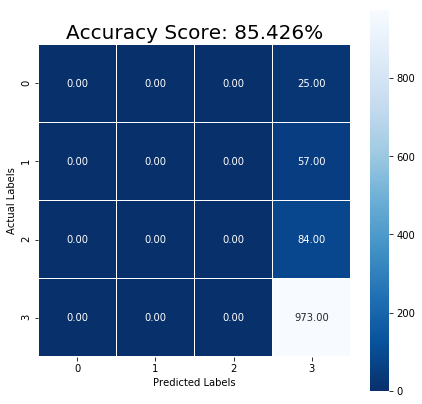

In [30]:
plt.figure(figsize = (7,7))

sns.heatmap(cm, annot = True, fmt = '.2f', linewidths = .5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual Labels');
plt.xlabel('Predicted Labels');
all_sample_title = 'Accuracy Score: {0}%'.format(round(score*100,3))
plt.title(all_sample_title, size = 20);

plt.show()

#### Visualizing decision tree

In [31]:
dot_data = StringIO()

tree.export_graphviz(clf, out_file=dot_data, feature_names = data_list, filled=True, rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_pdf("non_loyal_customers_cluster0_tree.pdf")

### Decision Tree for Cluster 1

In [32]:
cluster1 = dataset[dataset['Cluster'] == 1]

In [33]:
test_list = ['wc_num_items', 'Num_Adults', 'Num_Children', 'ZIP_Income', 'Buyer_Reatil_Last_Order_Quantity', 'Buyer_Reatil_Last_Order_Dollars', 'Marital_Status', 'Homeowner_Status', 'Dwelling_Type', 'HH_Income', 'Dual_Income', 'Home_Market_Value', 'Net_Worth', 'Mail_Order_Buyer', 'Mail_Order_Response', 'Buyer_Retail_Last_Order_2yrs']

In [34]:
cluster1.head()

,dataright_seq,Loyalty,RFM_score,wc_bought_any,wc_num_items,wc_big_ticket_bought_any,wc_big_ticket_num_items,wc_low_ticket_bought_any,wc_low_ticket_num_items,wc_big_ticket_amt_spent,wc_low_ticket_amt_spent,client_times_shopped_30_days,client_shopped_3_mos,comp1_times_shopped_30_days,comp1_shopped_3_mos,comp2_times_shopped_30_days,comp2_shopped_3_mos,comp3_times_shopped_30_days,comp3_shopped_3_mos,Marital_Status,Homeowner_Status,Dwelling_Type,Gender,Age,Num_Adults,Num_Children,Child_0_2,Child_3_5,Child_6_10,Child_11_15,Child_16_18,Race,HH_Income,Eff_Income,Socioeconomic_Score,ZIP_Income,Dual_Income,Home_Market_Value,Net_Worth,Mail_Order_Buyer,Mail_Ord_Books,Mail_Ord_BooksMags,Mail_Ord_Child_Prod,Mail_Ord_Clothes,Mail_Ord_Cosmetic,Mail_Ord_Food,Mail_Ord_Gifts,Mail_Ord_Furniture,Mail_Ord_Mags,Mail_Ord_Others,Mail_Ord_Jewel,Mail_Ord_Big_Clothes,Mail_Ord_DVD,Mail_Order_Response,Occupation,Education,State,Est_HH_Debt_Level,Est_HH_Invest_Asset,Len_of_Residence,Bank_Card_New_Issue_Year,Bank_Card,Retail_Card,Buyer_Retail_Last_Order_2yrs,Buyer_Retail_Last_Order_1yrs,Buyer_Reatil_Last_Order_Quantity,Buyer_Reatil_Last_Order_Dollars,client_shopped_30_days,comp1_shopped_30_days,comp2_shopped_30_days,comp3_shopped_30_days,Cluster
0,2519,1,1,1,B,0,0,1,B,0,A,U,0,U,0,U,0,U,0,S,R,M,F,D,1,0,0,0,0,0,0,W,B,B,B,4,Y,A,A,M,1,1,0,0,0,0,0,0,0,0,0,0,1,M,B,U,CT,F,A,15.0,U,M,M,N,N,0,0,0,0,0,0,1
3,2525,1,1,1,B,0,0,1,B,0,A,U,0,U,0,U,0,U,0,S,R,S,F,D,1,0,0,0,0,0,0,W,A,B,B,0,Y,A,A,N,0,0,0,0,0,0,0,0,0,0,0,0,0,N,U,U,CT,E,A,NaN,U,U,U,N,N,0,0,0,0,0,0,1
9,5052,1,3,1,C,1,A,1,C,1,E,U,0,U,0,U,0,U,0,S,O,S,F,G,2,0,0,0,0,0,0,U,B,C,B,1,Y,E,A,N,0,0,0,0,0,0,0,0,0,0,0,0,0,N,U,U,NJ,B,A,12.0,U,U,U,N,N,0,0,0,0,0,0,1
11,4808,1,2,1,C,0,0,1,C,0,C,U,0,U,0,U,0,U,0,M,O,S,M,F,1,2,0,0,0,1,1,W,B,B,A,4,Y,D,E,M,0,0,0,0,0,0,0,0,0,0,0,0,0,M,U,1,NJ,B,F,4.0,7,M,M,N,N,0,0,0,0,0,0,1
12,4812,1,1,1,C,0,0,1,C,0,B,U,0,U,0,U,0,U,0,S,O,S,F,G,1,0,0,0,0,0,0,W,A,B,A,0,Y,E,F,M,0,0,0,0,0,0,0,0,0,0,0,0,0,M,H,1,NJ,B,F,15.0,U,M,U,N,N,0,0,0,0,0,0,1


In [35]:
cluster1 = cluster1[test_list]

In [36]:
dummies = pd.get_dummies(cluster1.iloc[:,1:])

In [37]:
cluster1 = pd.concat([cluster1['wc_num_items'],dummies],axis = 1)

In [38]:
data_list = list(cluster1.columns)[1:]

In [39]:
tree_train, tree_test = train_test_split(cluster1, test_size=0.33, random_state=777)

In [40]:
cluster1.shape

(3738, 52)

In [41]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes=7, min_samples_leaf = 30)

In [42]:
clf = clf.fit(tree_train[data_list], tree_train['wc_num_items'])

In [43]:
test_preds = clf.predict(tree_test[data_list])

In [44]:
clf.predict_proba(tree_test[data_list])

array([[0.01364256, 0.07230559, 0.08185539, 0.83219645],
       [0.01364256, 0.07230559, 0.08185539, 0.83219645],
       [0.01409869, 0.04632427, 0.05740181, 0.88217523],
       ...,
       [0.01364256, 0.07230559, 0.08185539, 0.83219645],
       [0.01409869, 0.04632427, 0.05740181, 0.88217523],
       [0.01409869, 0.04632427, 0.05740181, 0.88217523]])

In [45]:
score = clf.score(tree_test[data_list], tree_test['wc_num_items'])

#### Creating confusion matrix

In [46]:
cm = confusion_matrix(tree_test['wc_num_items'], test_preds)

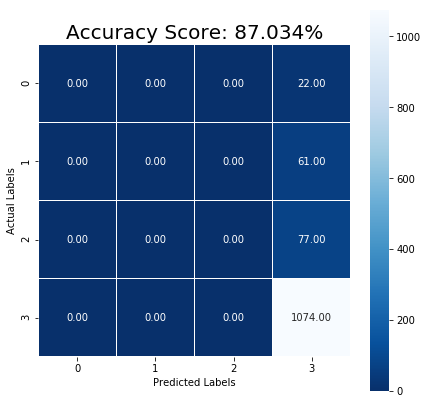

In [47]:
plt.figure(figsize = (7,7))

sns.heatmap(cm, annot = True, fmt = '.2f', linewidths = .5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual Labels');
plt.xlabel('Predicted Labels');
all_sample_title = 'Accuracy Score: {0}%'.format(round(score*100,3))
plt.title(all_sample_title, size = 20);

plt.show()

#### Visualizing decision tree

In [48]:
dot_data = StringIO()

tree.export_graphviz(clf, out_file=dot_data, feature_names = data_list, filled=True, rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_pdf("non_loyal_customers_cluster1_tree.pdf")

### Decision Tree for Cluster 2

In [49]:
cluster2 = dataset[dataset['Cluster'] == 2]

In [50]:
test_list = ['wc_num_items', 'Num_Adults', 'Num_Children', 'ZIP_Income', 'Buyer_Reatil_Last_Order_Quantity', 'Buyer_Reatil_Last_Order_Dollars', 'Marital_Status', 'Homeowner_Status', 'Dwelling_Type', 'HH_Income', 'Dual_Income', 'Home_Market_Value', 'Net_Worth', 'Mail_Order_Buyer', 'Mail_Order_Response', 'Buyer_Retail_Last_Order_2yrs']

In [51]:
cluster2.head()

,dataright_seq,Loyalty,RFM_score,wc_bought_any,wc_num_items,wc_big_ticket_bought_any,wc_big_ticket_num_items,wc_low_ticket_bought_any,wc_low_ticket_num_items,wc_big_ticket_amt_spent,wc_low_ticket_amt_spent,client_times_shopped_30_days,client_shopped_3_mos,comp1_times_shopped_30_days,comp1_shopped_3_mos,comp2_times_shopped_30_days,comp2_shopped_3_mos,comp3_times_shopped_30_days,comp3_shopped_3_mos,Marital_Status,Homeowner_Status,Dwelling_Type,Gender,Age,Num_Adults,Num_Children,Child_0_2,Child_3_5,Child_6_10,Child_11_15,Child_16_18,Race,HH_Income,Eff_Income,Socioeconomic_Score,ZIP_Income,Dual_Income,Home_Market_Value,Net_Worth,Mail_Order_Buyer,Mail_Ord_Books,Mail_Ord_BooksMags,Mail_Ord_Child_Prod,Mail_Ord_Clothes,Mail_Ord_Cosmetic,Mail_Ord_Food,Mail_Ord_Gifts,Mail_Ord_Furniture,Mail_Ord_Mags,Mail_Ord_Others,Mail_Ord_Jewel,Mail_Ord_Big_Clothes,Mail_Ord_DVD,Mail_Order_Response,Occupation,Education,State,Est_HH_Debt_Level,Est_HH_Invest_Asset,Len_of_Residence,Bank_Card_New_Issue_Year,Bank_Card,Retail_Card,Buyer_Retail_Last_Order_2yrs,Buyer_Retail_Last_Order_1yrs,Buyer_Reatil_Last_Order_Quantity,Buyer_Reatil_Last_Order_Dollars,client_shopped_30_days,comp1_shopped_30_days,comp2_shopped_30_days,comp3_shopped_30_days,Cluster
7,3173,1,1,1,B,1,A,1,A,A,A,U,0,U,0,U,0,U,0,M,O,S,F,G,2,1,0,0,1,0,0,H,D,B,A,9,N,H,G,M,0,0,0,0,0,0,0,0,0,0,0,0,0,M,U,1,NJ,C,G,11.0,17,M,M,N,N,0,0,0,0,0,0,2
39,2535,1,3,1,C,1,B,1,C,B,D,U,0,U,0,U,0,U,0,S,O,S,F,G,1,0,0,0,0,0,0,W,D,D,D,1,Y,F,H,Y,0,0,0,0,0,0,0,0,0,0,0,0,1,M,G,U,CT,B,J,1.0,16,M,M,N,N,0,0,0,0,0,0,2
41,2537,1,1,1,A,1,A,0,0,A,0,U,0,U,0,U,0,U,0,M,O,S,M,G,4,2,0,0,1,1,0,W,D,D,D,2,N,G,G,M,0,1,0,1,0,1,1,0,1,0,0,0,1,M,U,U,CT,B,G,15.0,U,M,M,Y,Y,1,206,0,0,0,0,2
45,3442,1,2,1,C,0,0,1,C,0,D,U,0,U,0,U,0,U,0,M,O,S,M,G,2,1,0,0,1,0,0,W,E,D,D,4,Y,I,G,M,0,0,0,0,0,0,0,0,0,0,0,0,0,M,U,2,NJ,D,H,15.0,7,M,M,N,N,0,0,0,0,0,0,2
46,3445,1,3,1,C,1,A,1,C,B,D,U,0,U,0,U,0,U,0,S,O,S,F,E,4,0,0,0,0,0,0,W,G,D,D,8,N,J,H,M,0,0,0,0,0,0,0,0,0,0,0,0,0,M,U,2,NJ,E,J,15.0,U,M,M,Y,N,2,205,0,0,0,0,2


In [52]:
cluster2 = cluster2[test_list]

In [53]:
dummies = pd.get_dummies(cluster2.iloc[:,1:])

In [54]:
cluster2 = pd.concat([cluster2['wc_num_items'],dummies],axis = 1)

In [55]:
data_list = list(cluster2.columns)[1:]

In [56]:
tree_train, tree_test = train_test_split(cluster2, test_size=0.33, random_state=777)

In [57]:
cluster2.shape

(1948, 52)

In [58]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes=7, min_samples_leaf = 30)

In [59]:
clf = clf.fit(tree_train[data_list], tree_train['wc_num_items'])

In [60]:
test_preds = clf.predict(tree_test[data_list])

In [61]:
clf.predict_proba(tree_test[data_list])

array([[0.03405573, 0.04643963, 0.0619195 , 0.85758514],
       [0.01481481, 0.03703704, 0.02962963, 0.91851852],
       [0.01204819, 0.06024096, 0.07831325, 0.84939759],
       ...,
       [0.03405573, 0.04643963, 0.0619195 , 0.85758514],
       [0.01186944, 0.03857567, 0.03264095, 0.91691395],
       [0.01204819, 0.06024096, 0.07831325, 0.84939759]])

In [62]:
score = clf.score(tree_test[data_list], tree_test['wc_num_items'])

#### Creating confusion matrix

In [63]:
cm = confusion_matrix(tree_test['wc_num_items'], test_preds)

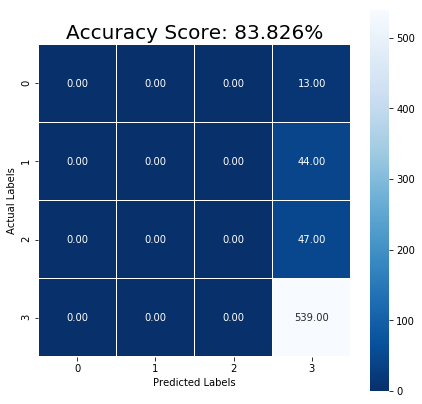

In [64]:
plt.figure(figsize = (7,7))

sns.heatmap(cm, annot = True, fmt = '.2f', linewidths = .5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual Labels');
plt.xlabel('Predicted Labels');
all_sample_title = 'Accuracy Score: {0}%'.format(round(score*100,3))
plt.title(all_sample_title, size = 20);

plt.show()

#### Visualizing decision tree

In [65]:
dot_data = StringIO()

tree.export_graphviz(clf, out_file=dot_data, feature_names = data_list, filled=True, rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_pdf("non_loyal_customers_cluster2_tree.pdf")

### Decision Tree for Cluster 3

In [66]:
cluster3 = dataset[dataset['Cluster'] == 3]

In [67]:
test_list = ['wc_num_items', 'Num_Adults', 'Num_Children', 'ZIP_Income', 'Buyer_Reatil_Last_Order_Quantity', 'Buyer_Reatil_Last_Order_Dollars', 'Marital_Status', 'Homeowner_Status', 'Dwelling_Type', 'HH_Income', 'Dual_Income', 'Home_Market_Value', 'Net_Worth', 'Mail_Order_Buyer', 'Mail_Order_Response', 'Buyer_Retail_Last_Order_2yrs']

In [68]:
cluster3.head()

,dataright_seq,Loyalty,RFM_score,wc_bought_any,wc_num_items,wc_big_ticket_bought_any,wc_big_ticket_num_items,wc_low_ticket_bought_any,wc_low_ticket_num_items,wc_big_ticket_amt_spent,wc_low_ticket_amt_spent,client_times_shopped_30_days,client_shopped_3_mos,comp1_times_shopped_30_days,comp1_shopped_3_mos,comp2_times_shopped_30_days,comp2_shopped_3_mos,comp3_times_shopped_30_days,comp3_shopped_3_mos,Marital_Status,Homeowner_Status,Dwelling_Type,Gender,Age,Num_Adults,Num_Children,Child_0_2,Child_3_5,Child_6_10,Child_11_15,Child_16_18,Race,HH_Income,Eff_Income,Socioeconomic_Score,ZIP_Income,Dual_Income,Home_Market_Value,Net_Worth,Mail_Order_Buyer,Mail_Ord_Books,Mail_Ord_BooksMags,Mail_Ord_Child_Prod,Mail_Ord_Clothes,Mail_Ord_Cosmetic,Mail_Ord_Food,Mail_Ord_Gifts,Mail_Ord_Furniture,Mail_Ord_Mags,Mail_Ord_Others,Mail_Ord_Jewel,Mail_Ord_Big_Clothes,Mail_Ord_DVD,Mail_Order_Response,Occupation,Education,State,Est_HH_Debt_Level,Est_HH_Invest_Asset,Len_of_Residence,Bank_Card_New_Issue_Year,Bank_Card,Retail_Card,Buyer_Retail_Last_Order_2yrs,Buyer_Retail_Last_Order_1yrs,Buyer_Reatil_Last_Order_Quantity,Buyer_Reatil_Last_Order_Dollars,client_shopped_30_days,comp1_shopped_30_days,comp2_shopped_30_days,comp3_shopped_30_days,Cluster
1,2521,1,3,1,C,0,0,1,C,0,E,U,0,U,0,U,0,U,0,M,O,S,F,D,5,1,0,1,0,0,0,B,C,B,B,9,Y,D,E,M,0,0,0,0,0,0,0,0,0,0,0,0,0,M,U,U,CT,B,D,15.0,5,M,M,N,N,0,0,0,0,0,0,3
2,2524,1,2,1,C,0,0,1,C,0,C,U,0,U,0,U,0,U,0,M,O,S,F,F,5,3,1,1,0,0,0,B,C,B,B,9,N,D,F,M,0,1,0,1,0,0,0,0,1,1,0,0,0,M,E,U,CT,B,G,15.0,17,M,M,N,N,0,0,0,0,0,0,3
8,5050,1,2,1,C,1,C,1,C,B,C,U,0,U,0,U,0,U,0,M,O,S,F,A,3,1,0,0,0,0,1,W,D,C,B,7,N,F,F,N,0,0,0,0,0,0,0,0,0,0,0,0,0,M,B,U,NJ,H,F,15.0,16,M,M,N,N,1,30,0,0,0,0,3
29,6901,1,2,1,C,1,A,1,C,B,C,U,0,U,0,U,0,U,0,M,O,S,F,C,6,6,0,1,0,1,0,H,D,C,B,7,Y,A,F,M,0,0,0,0,0,0,0,0,0,0,0,0,0,M,U,1,NY,D,F,15.0,U,M,M,Y,N,1,43,0,0,0,0,3
47,3178,1,1,1,A,1,A,0,0,A,0,U,0,U,0,U,0,U,0,M,O,S,F,A,5,1,0,1,0,0,0,B,D,B,A,9,N,E,D,M,0,0,0,0,0,0,0,0,0,0,0,0,0,M,U,1,NJ,I,C,15.0,17,M,M,N,N,3,84,0,0,0,0,3


In [69]:
cluster3 = cluster3[test_list]

In [70]:
dummies = pd.get_dummies(cluster3.iloc[:,1:])

In [71]:
cluster3 = pd.concat([cluster3['wc_num_items'],dummies],axis = 1)

In [72]:
data_list = list(cluster3.columns)[1:]

In [73]:
tree_train, tree_test = train_test_split(cluster3, test_size=0.33, random_state=777)

In [74]:
cluster3.shape

(2365, 52)

In [75]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes=7, min_samples_leaf = 30)

In [76]:
clf = clf.fit(tree_train[data_list], tree_train['wc_num_items'])

In [77]:
test_preds = clf.predict(tree_test[data_list])

In [78]:
clf.predict_proba(tree_test[data_list])

array([[0.01863354, 0.0310559 , 0.03726708, 0.91304348],
       [0.025     , 0.075     , 0.025     , 0.875     ],
       [0.01516793, 0.05742145, 0.06175515, 0.86565547],
       ...,
       [0.01516793, 0.05742145, 0.06175515, 0.86565547],
       [0.01863354, 0.0310559 , 0.03726708, 0.91304348],
       [0.01516793, 0.05742145, 0.06175515, 0.86565547]])

In [79]:
score = clf.score(tree_test[data_list], tree_test['wc_num_items'])

#### Creating confusion matrix

In [80]:
cm = confusion_matrix(tree_test['wc_num_items'], test_preds)

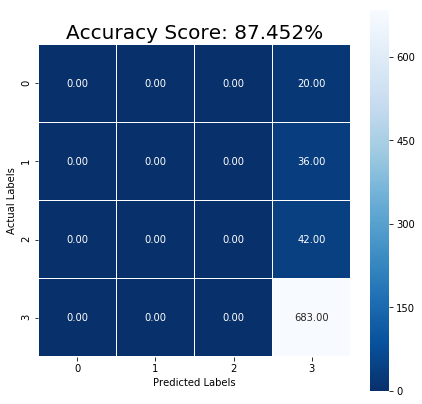

In [81]:
plt.figure(figsize = (7,7))

sns.heatmap(cm, annot = True, fmt = '.2f', linewidths = .5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual Labels');
plt.xlabel('Predicted Labels');
all_sample_title = 'Accuracy Score: {0}%'.format(round(score*100,3))
plt.title(all_sample_title, size = 20);

plt.show()

#### Visualizing decision tree

In [83]:
dot_data = StringIO()

tree.export_graphviz(clf, out_file=dot_data, feature_names = data_list, filled=True, rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_pdf("non_loyal_customers_cluster3_tree.pdf")